# Final Assignment: Bike Sharing Demand Dataset
## Task 1: Describe the Dataset
1. Read the CSV file with pandas.read_csv and parse the datetime
column.
    - we're printing values.head() to see the first five rows of our csv file
    - values.info() could be used for general type and column declaration 


In [1]:
import pandas as pd
import numpy as np

values = pd.read_csv("day.csv")

df = pd.DataFrame({
    "target": values["cnt"],
    "datetime": pd.to_datetime(values["dteday"]),
    "weather_feature": values["weathersit"],
    "temperature_feature": values["temp"],
    "humidity_feature": values["hum"],
    "windspeed_feature": values["windspeed"],
    "season_feature": values["season"],
    "holiday_feature": values["holiday"],
    "working_day_feature": values["workingday"],
    "weekday_feature": values["weekday"]
})

df.head()

ModuleNotFoundError: No module named 'pandas'

2. Report:
    - *Number of rows and columns.*
        - rows: 731
        - columns: 16
    - *Time range covered by the data.*
        - By printing the parsed date and time columns, we're getting the range of any possible data.
        - dataset from 01.01.2011 to 31.12.2012



In [ ]:

print("(rows, columns):", values.shape) # => 731 rows, 16 columns
print("\nDatetime: \n", df["datetime"])


(rows, columns): (731, 16)

Datetime: 
 0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: datetime, Length: 731, dtype: datetime64[ns]


- Target variable and list of feature variables (names and data types)
    - Target variable: 
        - Name: cnt / count of all currently rented bikes 
        - Type: Numeric
    -  feature variables: below

In [ ]:
# values.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   target               731 non-null    int64         
 1   datetime             731 non-null    datetime64[ns]
 2   weather_feature      731 non-null    int64         
 3   temperature_feature  731 non-null    float64       
 4   humidity_feature     731 non-null    float64       
 5   windspeed_feature    731 non-null    float64       
 6   season_feature       731 non-null    int64         
 7   holiday_feature      731 non-null    int64         
 8   working_day_feature  731 non-null    int64         
 9   weekday_feature      731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 57.2 KB


- Create a variable description table

In [ ]:
print("Description: \n", df.describe())

Description: 
             target             datetime  weather_feature  temperature_feature  \
count   731.000000                  731       731.000000           731.000000   
mean   4504.348837  2012-01-01 00:00:00         1.395349             0.495385   
min      22.000000  2011-01-01 00:00:00         1.000000             0.059130   
25%    3152.000000  2011-07-02 12:00:00         1.000000             0.337083   
50%    4548.000000  2012-01-01 00:00:00         1.000000             0.498333   
75%    5956.000000  2012-07-01 12:00:00         2.000000             0.655417   
max    8714.000000  2012-12-31 00:00:00         3.000000             0.861667   
std    1937.211452                  NaN         0.544894             0.183051   

       humidity_feature  windspeed_feature  season_feature  holiday_feature  \
count        731.000000         731.000000      731.000000       731.000000   
mean           0.627894           0.190486        2.496580         0.028728   
min            0.0

4. Check for:
    - *Missing values per column.*
    - *Duplicated rows (if any).*
    - there are no missing or dublicated rows

In [ ]:
# Summary of missing values
print("Number of missing values:", values.isnull().sum().sum())

# Summary of dublicated rows
dRowsSum = values.duplicated(keep=False).sum().sum()
print ("dublicated rows:", dRowsSum)

Number of missing values: 0
dublicated rows: 0


## Description I
- *For numeric variables: calculate mean, standard deviation, minimum, maximum, and quartiles*
    - see the results above
- *For categorical variables: show frequency tables or bar charts (e.g. distribution of seasons or weather types).*

season_feature
1    181
2    184
3    188
4    178
dtype: int64


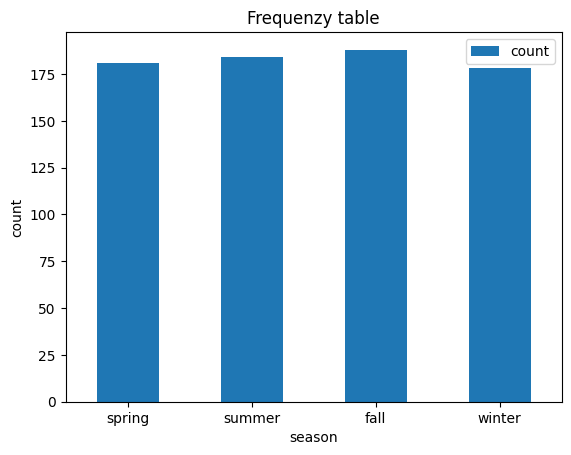

weather_feature
1    463
2    247
3     21
dtype: int64


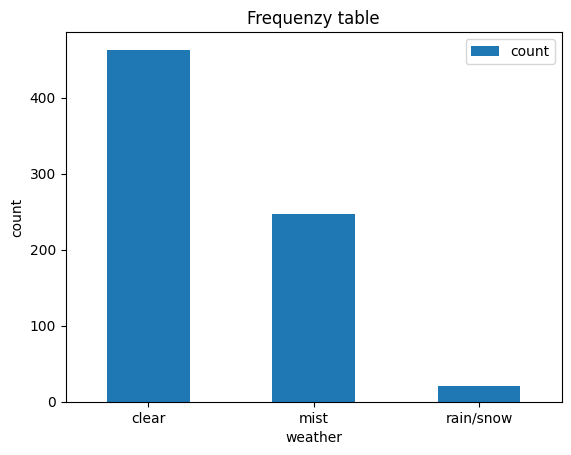

weekday_feature
0    105
1    105
2    104
3    104
4    104
5    104
6    105
dtype: int64


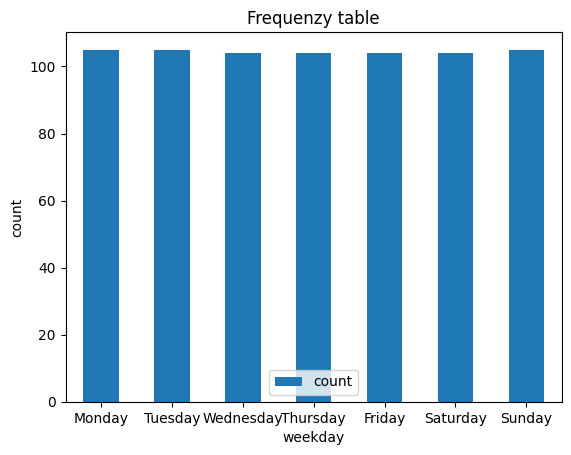

In [ ]:
import matplotlib.pyplot as plt
cols = ["season_feature", "weather_feature", "weekday_feature"]    

szy = df.groupby(cols[0]).size()
print(szy)
szx = ["spring", "summer", "fall", "winter"]
df_season = pd.DataFrame({"season": szx,
             "count": szy})
ax = df_season.plot.bar(x='season', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("season")
plt.ylabel("count")
plt.show()


szy = df.groupby(cols[1]).size()
print(szy)
szx = ["clear", "mist", "rain/snow"]
df_season = pd.DataFrame({"weather": szx,
             "count": szy})
ax = df_season.plot.bar(x='weather', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("weather")
plt.ylabel("count")
plt.show()


szy = df.groupby(cols[2]).size()
print(szy)
szx = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_season = pd.DataFrame({"weekday": szx,
             "count": szy})
ax = df_season.plot.bar(x='weekday', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("weekday")
plt.ylabel("count")
plt.show()

## Visulisation
To plot the total bike demand over the full period, i've set the date as x value and the rent count as y value.

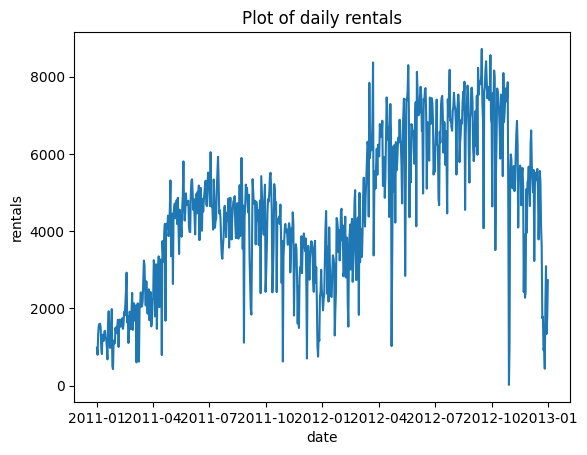

In [ ]:
import matplotlib.pyplot as plt

x = df["datetime"]
y = df["target"]

plt.plot(x, y)
plt.title("Plot of daily rentals")
plt.xlabel("date")
plt.ylabel("rentals")
plt.show()

distibution of numeric variables - histograms of temp, humidity, windspeed

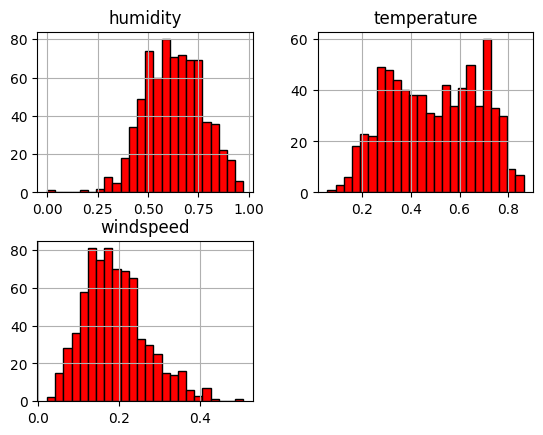

In [ ]:
df_numeric = pd.DataFrame({
    "humidity": df["humidity_feature"],
    "temperature": df["temperature_feature"],
    "windspeed": df["windspeed_feature"]
})

df_numeric.hist(bins =2*12 , color = "red" ,
edgecolor = "black")
plt.show()


- *Plot aggregated demand by season, day of week or hour of day (e.g. bar charts or line plots)*

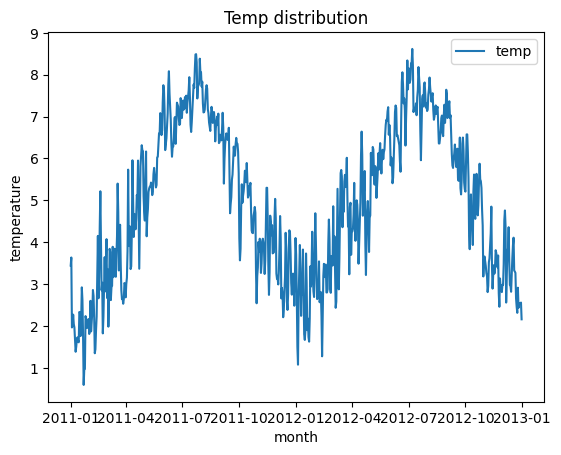

In [ ]:
plt.plot(df["datetime"], df["temperature_feature"] * 10, label="temp")
plt.title("Temp distribution")
plt.xlabel("month" )
plt.ylabel( "temperature" )
plt.legend()
plt.show()


- *Write a short text summary (3–5 sentences) describing main patterns you observe (seasonality, daily patterns, influence of weather, etc.).*

During season 2 and 3, the rent business is getting the most requests. On the last chart you can see equalities between the amount of rents and the temperature (same highs and lows). Even wind could be a small factor. With less wind, more people want to rent bikes.

## Preprocessing
- *Encode categorical variables (e.g. one-hot encoding for season, weather, weekday).*
- *Split the data into training, validation and test sets (for example 70 % / 10 % / 20 %) and scale numeric features using statistics from the training set only.*

     season_feature  weather_feature  weekday_feature  temperature_feature  \
0                 1                2                6             0.344167   
1                 1                2                0             0.363478   
2                 1                1                1             0.196364   
3                 1                1                2             0.200000   
4                 1                1                3             0.226957   
..              ...              ...              ...                  ...   
726               1                2                4             0.254167   
727               1                2                5             0.253333   
728               1                2                6             0.253333   
729               1                1                0             0.255833   
730               1                2                1             0.215833   

     humidity_feature  windspeed_feature  holiday_feature  \
0 

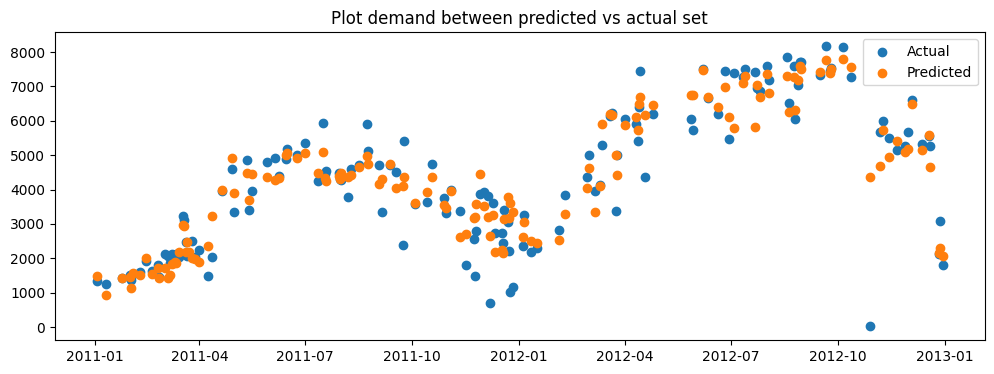

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
# encode categorical features
features = [
    "temperature_feature",
    "humidity_feature",
    "windspeed_feature",
    "holiday_feature",
    "working_day_feature"]
# onehot encoding 
df_categorical_encoded = pd.get_dummies(df[cols], dtype=int)
df_numeric = df[features]

df_features = pd.concat([df_categorical_encoded, df_numeric, pd.to_numeric(df["datetime"])], axis=1)
print(df_features)

# splitting data
from sklearn.model_selection import train_test_split
rand = 42
X = df_features
y = df["target"]
x_train_validation, x_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=rand)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_validation, y_train_validation, test_size=0.125, random_state=rand)

# train model
model = RandomForestRegressor(random_state=rand)
model.fit(x_train, y_train)

# evaluation
y_pred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

print(y_test)

plt.figure(figsize=(12,4))
plt.scatter(pd.to_datetime(x_test["datetime"]), y_test, label="Actual")
plt.scatter(pd.to_datetime(x_test["datetime"]), y_pred, label="Predicted")
plt.legend()
plt.title("Plot demand between predicted vs actual set")
plt.show()

## User-input predicition function
- Implement a Python function (or cell) that:
    - Accepts user inputs (e.g. season, weather, temp, humidity,windspeed, hour, weekday, is_holiday, is_workingday).
    - Applies the same preprocessing and scaling steps.
    - Uses the trained model to output a predicted count of bikes

In [ ]:
def user_input_prediction(
        season, 
        weather, 
        temp, 
        humidity, 
        windspeed, 
        weekday, 
        is_holiday, 
        is_workingday, 
        date):
    # todo use trained model to output predicition on bike demand
    new_df = pd.DataFrame({
        "season_feature": [season],
        "weather_feature": [weather],
        "weekday_feature": [weekday],
        "temperature_feature": [temp],
        "humidity_feature": [humidity],
        "windspeed_feature": [windspeed],
        "holiday_feature": [is_holiday],
        "working_day_feature": [is_workingday],
        "datetime": date
    })
    pred = model.predict(new_df)
    print(pred)


user_input_prediction(
    2, # summer
    1, # clear weather
    0.6,
    0.1,
    1.0,
    6, # Sunday
    1, # holiday
    0,
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

user_input_prediction(
    1, # spring
    1, # clear weather
    0.138333,
    0.434167,
    0.36195,
    3, # Thursday
    0,
    1, # Workingday
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

user_input_prediction(
    4, # Winter
    4, # snow
    0.0,
    1.0,
    1.0,
    0, # Monday 
    0,
    1, # Workingday
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

[2548.14]
[1454.03]
[843.08]


- *Demonstrate several example predictions for different scenarios and briefly interpret the results.*

1. Summer time with good weather and other perfect conditions
    - the model predicted a high rent rate
2. Good weather as well, but in spring and a working day
    - worse conditions compared to the first
    - less rents predicted compared to the first prediction
3. Very worse conditions
    - model predicted less rents than the upper scenarios

With that bad conditions from scenario 3, we would expect, that the model predicts even less rents on that day. But it tends very to good predictions, on that small amount of training data. 

## 3. 30-Day-Forecast

In [ ]:

# 1. Define features to use

# Numerical features that don't need one-hot encoding
features = [
    "temperature_feature",
    "humidity_feature",
    "windspeed_feature",
    "holiday_feature",
    "working_day_feature"
]

# Create copy
df_lag = df.copy()

# 2. Create lag features 


# Add past target values as new features

for lag in [1, 7, 24, 168]:
    df_lag[f"lag_{lag}"] = df_lag["target"].shift(lag)

# 3. Create rolling features



# average demand over the past week

df_lag["rolling_mean_7"] = df_lag["target"].shift(1).rolling(window=7, min_periods=1).mean()

# variation in demand over the past week
df_lag["rolling_std_7"] = df_lag["target"].shift(1).rolling(window=7, min_periods=1).std()

# average demand over the past month
df_lag["rolling_mean_30"] = df_lag["target"].shift(1).rolling(window=30, min_periods=1).mean()


# 4. Handle missing values

# Remove rows with missing values caused by shifting
df_lag.dropna(inplace=True)


# 5. Encode categorical variables

# One-hot encode categorical columns (season, weather, weekday)
df_categorical_encoded = pd.get_dummies(df_lag[cols], dtype=int)


# 6. Combine all features

# Select numeric features incl. lag and rolling features
df_numeric = df_lag[features + ["lag_1", "lag_7", "lag_24", "lag_168", 
                                 "rolling_mean_7", "rolling_std_7", "rolling_mean_30"]]

# Combine categorical features, numeric features, and datetime
df_features = pd.concat(
    [df_categorical_encoded, df_numeric, pd.to_numeric(df_lag["datetime"])],
    axis=1
)


# 7. Split data into train/validation/test sets

X = df_features
y = df_lag["target"]

# Time-based split 
n = len(X)
n_train = int(0.7 * n)
n_val = int(0.15 * n)    

X_train = X[:n_train]
y_train = y[:n_train]

X_val = X[n_train : n_train + n_val]
y_val = y[n_train : n_train + n_val]

X_test = X[n_train + n_val :]
y_test = y[n_train + n_val :]


# 8. Scale features 

from sklearn.preprocessing import StandardScaler

# Create Scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Apply scaling to train, val, test sets
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train), 
    columns=X_train.columns, 
    index=X_train.index
)
X_val_scaled = pd.DataFrame(
    scaler.transform(X_val), 
    columns=X_val.columns, 
    index=X_val.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), 
    columns=X_test.columns, 
    index=X_test.index
)


# 9. Build and train the Random Forest model

from sklearn.ensemble import RandomForestRegressor


# Create Random Forest model 
model = RandomForestRegressor(
    random_state=42     
)

# Train the model on scaled training data
model.fit(X_train_scaled, y_train)


# 10. Evaluate on validation set

# Predict on validation set 
y_val_pred = model.predict(X_val_scaled)

# R² score
val_score = model.score(X_val_scaled, y_val)
print(f"\nValidation R² score: {val_score:.4f}")



Validation R² score: 0.2193


EVALUATION ON TEST PERIOD

Model Performance Metrics:
RMSE: 1570.71
MAE:  1081.87
MAPE: 256.23%

Naive Baseline Metrics:
RMSE: 1289.91
MAE:  901.87
MAPE: 261.18%

Improvement over Naive Baseline:
RMSE: -21.8%
MAE:  -20.0%
MAPE: +1.9%


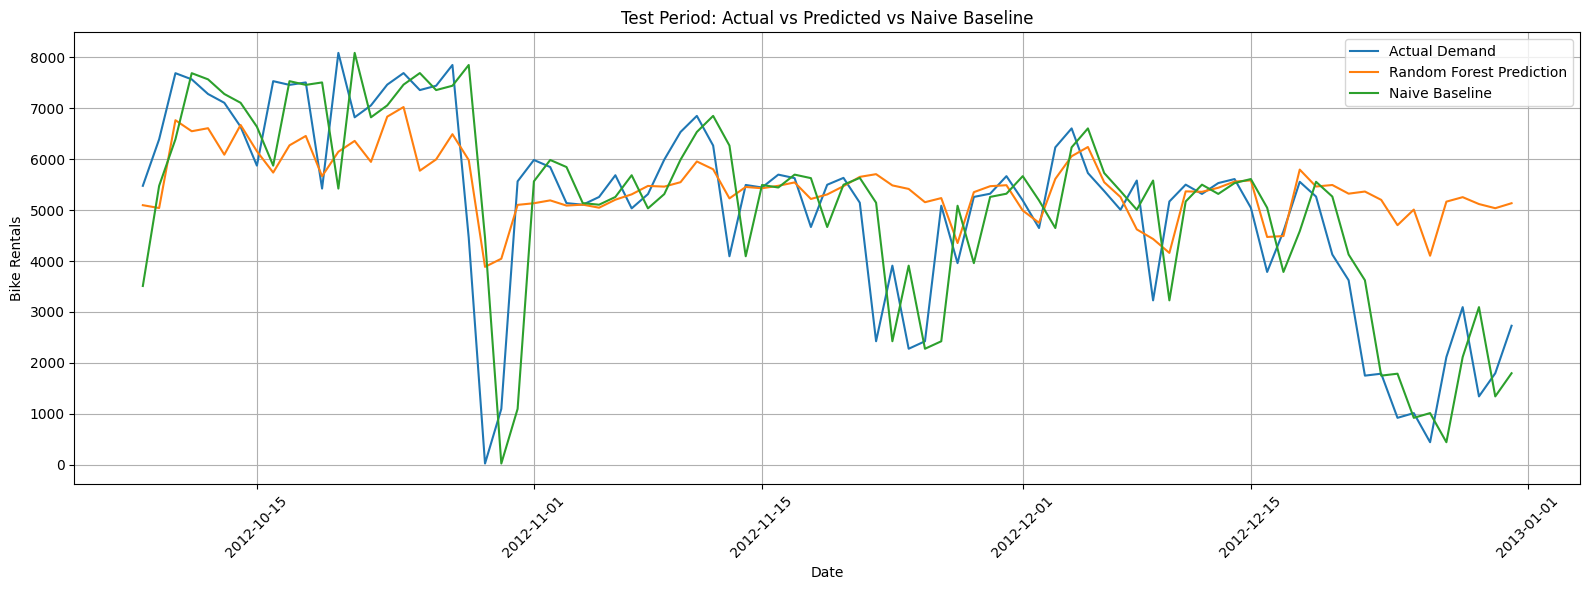

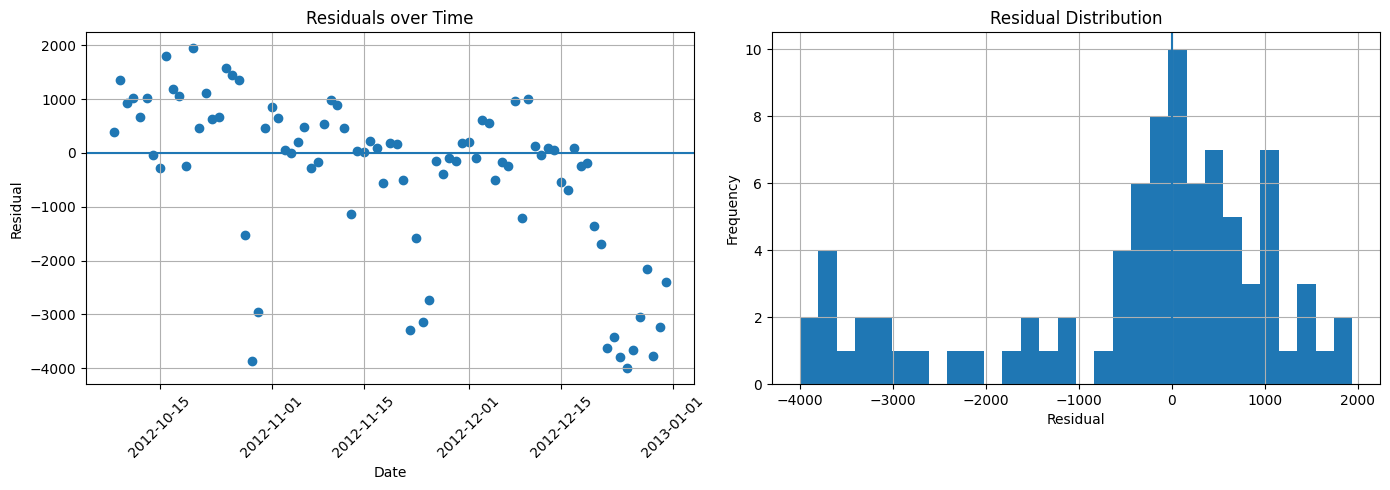


Residual Statistics:
Mean: -404.74
Std:  1517.67
Min:  -3997.96
Max:  1942.40


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt



# 1. Generate predictions on test set

# Predict target values for the test set using our trained model
y_test_pred = model.predict(X_test_scaled)


# 2. Calculate error metrics

# RMSE 
test_rmse = np.sqrt(np.mean((y_test.values - y_test_pred) ** 2))

# MAE 
test_mae = mean_absolute_error(y_test, y_test_pred)

# MAPE 
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\nModel Performance Metrics:")
print(f"RMSE: {test_rmse:.2f} bikes")
print(f"MAE:  {test_mae:.2f} bikes")
print(f"MAPE: {test_mape:.2f}%")


# 3. Create naive baseline

y_naive = df["target"].shift(1).loc[y_test.index].values

# Calculate baseline error metrics
naive_rmse = np.sqrt(np.mean((y_test.values - y_naive) ** 2))
naive_mae = mean_absolute_error(y_test, y_naive)
naive_mape = mean_absolute_percentage_error(y_test, y_naive) * 100

print("\nNaive Baseline Metrics (yesterday's demand as prediction):")
print(f"RMSE: {naive_rmse:.2f} bikes")
print(f"MAE:  {naive_mae:.2f} bikes")
print(f"MAPE: {naive_mape:.2f}%")



# 5. Visualize predictions vs actual demand


# Get test set dates for x axis
dates_test = df.loc[y_test.index, "datetime"]

# Plot actual values, model predictions, and baseline predictions
plt.figure(figsize=(16, 6))
plt.plot(dates_test, y_test.values, label="Actual Demand", linewidth=2)
plt.plot(dates_test, y_test_pred, label="Random Forest Prediction", linewidth=2, alpha=0.8)
plt.plot(dates_test, y_naive, label="Naive Baseline (yesterday)", linewidth=2, alpha=0.6, linestyle='--')
plt.legend(fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Bike Rentals", fontsize=12)
plt.title("Test Period: Actual vs Predicted vs Naive Baseline", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6. Analyze prediction errors (residuals)

residuals = y_test.values - y_test_pred

# Visualize residuals over time and as a distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Residuals over time: helps identify patterns in errors (e.g., systematic bias)
# Good model = residuals randomly scattered around 0
ax1.scatter(dates_test, residuals, alpha=0.6)
ax1.axhline(0, color='red', linestyle='--', linewidth=2, label='Perfect prediction')
ax1.set_title("Residuals over Time", fontsize=14)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Residual (Actual - Predicted)", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Residual distribution
ax2.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero error')
ax2.set_title("Residual Distribution", fontsize=14)
ax2.set_xlabel("Residual (Actual - Predicted)", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


### Forecast

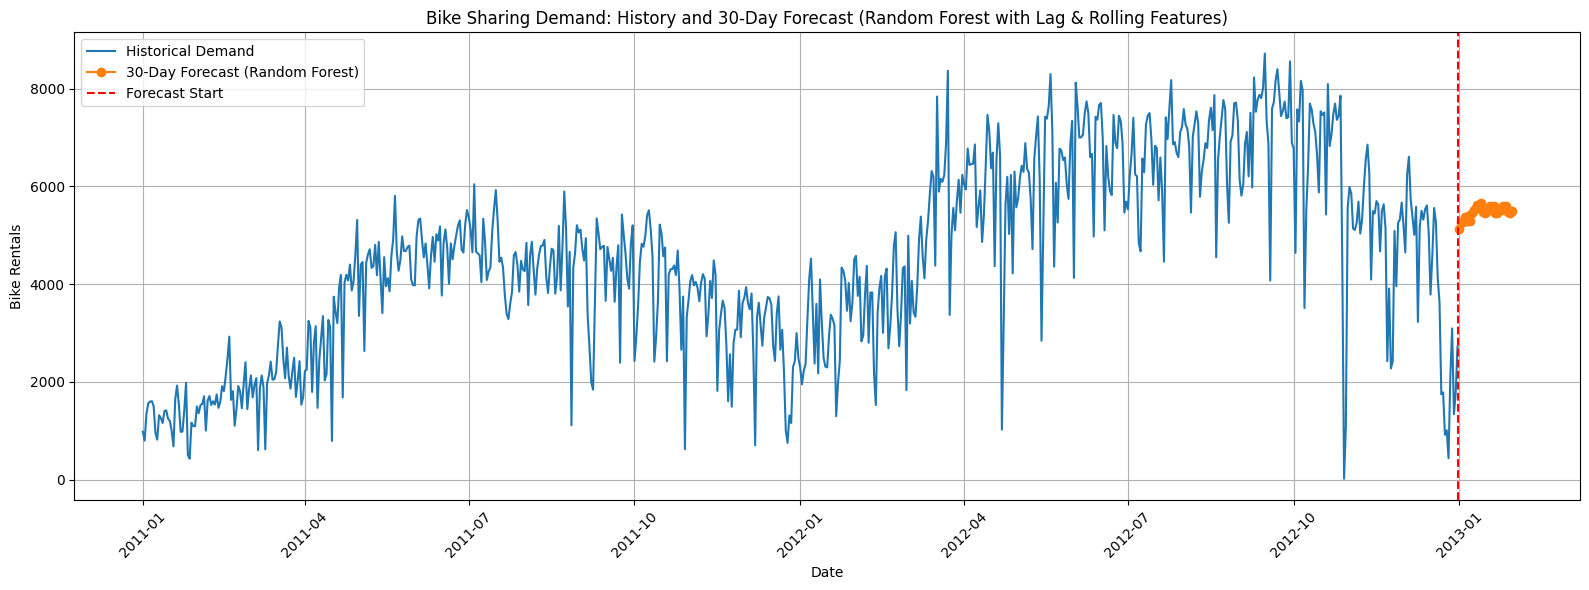


Forecast Summary (30-Day Forecast)
      Date   Weekday  Predicted Rentals
2013-01-01   Tuesday               5126
2013-01-02 Wednesday               5261
2013-01-03  Thursday               5275
2013-01-04    Friday               5367
2013-01-05  Saturday               5286
2013-01-06    Sunday               5395
2013-01-07    Monday               5285
2013-01-08   Tuesday               5459
2013-01-09 Wednesday               5509
2013-01-10  Thursday               5553
2013-01-11    Friday               5613
2013-01-12  Saturday               5600
2013-01-13    Sunday               5660
2013-01-14    Monday               5468
2013-01-15   Tuesday               5450
2013-01-16 Wednesday               5481
2013-01-17  Thursday               5515
2013-01-18    Friday               5595
2013-01-19  Saturday               5571
2013-01-20    Sunday               5607
2013-01-21    Monday               5464
2013-01-22   Tuesday               5450
2013-01-23 Wednesday               5511
2013

In [ ]:

import datetime
import matplotlib.pyplot as plt

# Create a copy of the data that already contains lag features
forecast_df = df_lag.copy()


# Set up forecast parameters

# Start date for the forecast
last_date = forecast_df["datetime"].iloc[-1]
start_forecast_date = last_date + pd.Timedelta(days=1)

print(f"Last known date: {last_date.date()}")


# Use last known weather conditions

last_day_data = forecast_df.iloc[-1]
last_temp = last_day_data["temperature_feature"]
last_humidity = last_day_data["humidity_feature"]
last_windspeed = last_day_data["windspeed_feature"]


# Lists to store forecast dates and predicted values
forecast_dates = []
forecast_values = []

# Store recent history for lag calculations
recent_targets = list(forecast_df["target"].tail(168).values)

#Generate forecast for each day

for day in range(30):
    current_date = start_forecast_date + pd.Timedelta(days=day)
    
    #Calculate lag features from recent history 
    lag_1 = recent_targets[-1]
    
    #demand from 7 days ago
    lag_7 = recent_targets[-7] if len(recent_targets) >= 7 else np.mean(recent_targets)
    
    # demand from 24 days ago
    lag_24 = recent_targets[-24] if len(recent_targets) >= 24 else np.mean(recent_targets)
    
    # demand from 168 days ago
    lag_168 = recent_targets[-168] if len(recent_targets) >= 168 else np.mean(recent_targets)
    
    #Calculate rolling features 
    rolling_mean_7 = np.mean(recent_targets[-7:]) if len(recent_targets) >= 7 else np.mean(recent_targets)
    rolling_std_7 = np.std(recent_targets[-7:]) if len(recent_targets) >= 7 else 0
    rolling_mean_30 = np.mean(recent_targets[-30:]) if len(recent_targets) >= 30 else np.mean(recent_targets)
    
    #Categorical features for this forecast day 
    weekday = current_date.weekday()
    
    season = 1
    
    weather = 1
    
    is_holiday = 0
    
    is_workingday = 1 if weekday < 5 else 0
    
    #Create temporary dataframe with all features
    temp_df = pd.DataFrame({
        "season_feature": [season],
        "weather_feature": [weather],
        "weekday_feature": [weekday],
        "temperature_feature": [last_temp],
        "humidity_feature": [last_humidity],
        "windspeed_feature": [last_windspeed],
        "holiday_feature": [is_holiday],
        "working_day_feature": [is_workingday],
        "lag_1": [lag_1],
        "lag_7": [lag_7],
        "lag_24": [lag_24],
        "lag_168": [lag_168],
        "rolling_mean_7": [rolling_mean_7],
        "rolling_std_7": [rolling_std_7],
        "rolling_mean_30": [rolling_mean_30],
        "datetime": [current_date]
    })
    
    #Apply one-hot encoding to categorical features
    temp_categorical_encoded = pd.get_dummies(temp_df[cols], dtype=int)
    temp_numeric = temp_df[features + ["lag_1", "lag_7", "lag_24", "lag_168", 
                                        "rolling_mean_7", "rolling_std_7", "rolling_mean_30"]]
    
    #Combine all features
    X_new = pd.concat(
        [temp_categorical_encoded, temp_numeric, pd.to_numeric(temp_df["datetime"])],
        axis=1
    )
    
    # Add missing columns with 0 => handles one-hot encoded categories not seen in this forecast day
    for col in X_train.columns:
        if col not in X_new.columns:
            X_new[col] = 0
    
    # Reorder columns to match training data
    X_new = X_new[X_train.columns]
    
    #Scale features
    X_new_scaled = pd.DataFrame(
        scaler.transform(X_new),
        columns=X_new.columns,
        index=X_new.index
    )
    
    # Predict demand for current forecast day
    y_pred = model.predict(X_new_scaled)[0]
    
    #add prediction to recent history
    recent_targets.append(y_pred)
    
    #Save results for plotting
    forecast_dates.append(current_date)
    forecast_values.append(y_pred)


#Visualize historical data and forecast

# Plot historical data and forecasted values
plt.figure(figsize=(16, 6))
plt.plot(df["datetime"], df["target"], label="Historical Demand", linewidth=2)
plt.plot(forecast_dates, forecast_values, label="30-Day Forecast", 
         marker="o", markersize=4, linewidth=2, color='orange')
plt.axvline(x=last_date, linestyle="--", color="red", linewidth=2, label="Forecast Start", alpha=0.7)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Bike Rentals", fontsize=12)
plt.title("Bike Sharing Demand: History and 30-Day Forecast", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create and display forecast summary table

# Create a table with the forecast results
forecast_summary = pd.DataFrame({
    "Date": [d.date() for d in forecast_dates],
    "Weekday": [d.strftime("%A") for d in forecast_dates],
    "Predicted Rentals": [int(v) for v in forecast_values],
})

# Show all 30 forecasted days
print("\nForecast Summary (30-Day Forecast)")
print("=" * 60)
print(forecast_summary.to_string(index=False))

